In [ ]:
import pandas as pd

## Load Dataset

In [ ]:
data = {
    'name': ["Kang", "Kim", "Choi", "Park", "Yoon"],
    '짱절미': [True, False, False, False, False],
    '셀스타그램': [False, False, True, False, False],
    '우산': [False, False, False, False, False],
#    'follower': [0, 0, 100, 210, 0],
    'like': [True, False, True, True, False]
}

data = pd.DataFrame(data)
data = data.set_index("name")

print(data.shape)
data.head()

## Preprocessing

In [ ]:
label_name = "like"
label_name

In [ ]:
feature_names = data.columns.difference([label_name])
feature_names

## Prerequisites

### Visualize Tree

In [ ]:
import graphviz
from graphviz import Digraph

def display_node(dot, key, node):
    if node["leaf"] == True:
        probability = node['probability']
        probability = round(probability, 4)
        probability = str(probability)
        
        dot.node(key, probability)
    else:
        description = node['description']
        dot.node(key, description)
        
        if "left" in node:
            left_key = key + "L"
            display_node(dot, left_key, node['left'])
            dot.edge(key, left_key)

        if "right" in node:
            right_key = key + "R"
            display_node(dot, right_key, node['right'])
            dot.edge(key, right_key)

def display_tree(tree):
    dot = Digraph(comment='Decision Tree')

    display_node(dot, "Root", tree)

    return graphviz.Source(dot.source)

### Predict

In [ ]:
def predict(data, node):
    if node['leaf'] == True:
        probability = node["probability"]
        result = dict(zip(data.index, len(data) * [probability]))
    else:
        condition = node['condition']
        
        left_data = data[condition(data)]
        left_result = predict(left_data, node['left'])
        
        right_data = data[~condition(data)]
        right_result = predict(right_data, node['right'])    
    
        return {**left_result, **right_result}

    return result

## Prior Knowledge

### Dictionary

### Key 를 기준으로 value를 가져올때 사용하는 자료 구조

In [ ]:
vocabulary ={'apple':'사과','banana':'바나나'}
vocabulary

In [ ]:
vocabulary['apple']

In [ ]:
vocabulary['banana']

In [ ]:
vocabulary = {
    'apple' : {
        'ko':'사과',
        'ja':'ringo'
    },
    'banana' : {
        'ko':'바나나',
        'ja':'banana'
    }
}

vocabulary

In [ ]:
vocabulary['apple']['ja']

In [ ]:
vocabulary['banana']['ko']

### 함수 + 익명함수((lambda))

In [ ]:
def multiply(a, b):
    return a * b

In [ ]:
multiply(3,4)

In [ ]:
multiply(4,8)

In [ ]:
multiply = lambda a, b, c: a*b*c

In [ ]:
multiply(3,4,2)

In [ ]:
multiply(4,8,2)

### 재귀 함수

In [ ]:
def cycle(n):
    if n == 1:
        return [n]
    if n % 2 == 0:
        return [n] + cycle(n/2)
    else:
        return [n] + cycle(3*n + 1)

In [ ]:
print(cycle(1) == [1])
print(cycle(2) == [2, 1])
print(cycle(3) == [3, 10, 5, 16, 8, 4, 2, 1])
print(cycle(4) == [4, 2, 1])
print(cycle(5) == [5, 16, 8, 4, 2, 1])

### Closure

In [ ]:
def profile_generator(company):
    def user_generator(name):
        print(f"Name ={name}, Company = {company}")
    return user_generator

In [ ]:
generator = profile_generator('DS School')
generator

In [ ]:
generator('김지훈')

In [ ]:
generator('강성희')

## Implement a Decision Tree

### Make Conditions

In [ ]:
# Write your code here!

### Evaluate Gini Impurity

$$
{\displaystyle I_{G}(p)=\sum _{i=1}^{J}p_{i}(1-p_{i})=p_{t}(1-p_{t}) + p_{f}(1-p_{f})}
$$

In [ ]:
def evaluate_gini_impurity(data):
    if len(data) == 0:
        return 0
    
    true_probability = data["like"].mean()
    false_probability = 1 - true_probability
    
    true_gini_impurity = true_probability * (1 - true_probability)
    false_gini_impurity = false_probability * (1 - false_probability)
    
    gini_impurity = true_gini_impurity + false_gini_impurity
    
    return gini_impurity

evaluate_gini_impurity(data)

In [ ]:
def evaluate_average_gini_impurity(data, condition):
    left_data = data[condition(data)]
    right_data = data[~condition(data)]
    
    true_impurity = evaluate_gini_impurity(left_data)
    false_impurity = evaluate_gini_impurity(right_data)
    
    gini_impurity = len(left_data) * true_impurity + len(right_data) * false_impurity
    gini_impurity = gini_impurity / len(data)
    
    return gini_impurity

In [ ]:
condition = make_condition(binary_condition, "짱절미", True)
evaluate_average_gini_impurity(data, condition)

In [ ]:
condition = make_condition(binary_condition, "셀스타그램", True)
evaluate_average_gini_impurity(data, condition)

In [ ]:
condition = make_condition(binary_condition, "우산", True)
evaluate_average_gini_impurity(data, condition)

In [101]:
def find_best_condition(data, condition_list):
    best_gini_impurity = 9999
    best_condition = None
    best_description = None
    
    for description, condition in condition_list.items():
        gini_impurity = evaluate_average_gini_impurity(data, condition)
        
        if gini_impurity < best_gini_impurity:
            best_gini_impurity = gini_impurity
            best_condition = condition
            best_description = description
    return best_condition, best_description, best_gini_impurity

In [102]:
condition1 = make_condition(binary_condition, "짱절미", True)
condition2 = make_condition(binary_condition, "셀스타그램", True)
condition3 = make_condition(binary_condition, "우산", True)
    
condition_list = {
    "짱절미 == True": condition1,
    "셀스타그램 == True": condition2,
    "우산 == True": condition3
}

find_best_condition(data, condition_list)

(<function __main__.make_condition.<locals>.call_condition(data)>,
 '짱절미 == True',
 0.4)

### Make a Tree

In [ ]:
def binary_condition(data, feature_name, value):
    return data[feature_name] == value

def make_condition(method, feature_name, value):
    def call_condition(data):
        return method(data, feature_name, value)
    return call_condition

condition = make_condition(binary_condition, "짱절미", True)
#condition = make_condition(binary_condition, "셀스타그램", True)
#condition = make_condition(binary_condition, "우산", False)

data[condition(data)]

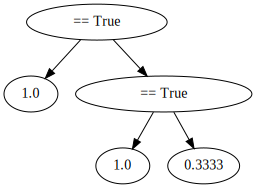

In [103]:
min_sample_split = 3
max_depth = 2

def make_node(data, condition_list, current_depth):
    condition_exists = len(condition_list) != 0
    data_exists = len(data) >= min_sample_split
    full_depth = (max_depth == None) or (current_depth < max_depth)
    
    if condition_exists and data_exists and full_depth:
        current_gini_impurity = evaluate_gini_impurity(data)
        
        condition, description, gini_impurity = \
            find_best_condition(data, condition_list)
        #description = list(condition_list.keys())[0]
        #condition = condition_list[description]
        
        left_data = data[condition(data)]
        right_data = data[~condition(data)]
        
        if gini_impurity < current_gini_impurity and len(left_data) != 0 and len(right_data) != 0:
            node = {'leaf': False, 'description': description, 'condition':condition}

            del condition_list[description]
            node['left'] =make_node(left_data, condition_list.copy(), current_depth+1)
            node['right'] =make_node(right_data, condition_list.copy(), current_depth+1)
            
            return node

    probability = data['like'].mean()
    node = {'leaf':True, 'probability':probability}
        
    return node

def make_tree(data):
    tree = {}
    
    condition1 = make_condition(binary_condition, "짱절미", True)
    condition2 = make_condition(binary_condition, "셀스타그램", True)
    condition3 = make_condition(binary_condition, "우산", True)
    
    condition_list = {
        "짱절미 == True": condition1,
        "셀스타그램 == True": condition2,
        "우산 == True": condition3
    }
    
    tree = make_node(data, condition_list, current_depth=0)
    
    return tree
tree = make_tree(data)

display_tree(tree)

In [ ]:
left_data = data[data["짱절미"] == True]
left_probability = left_data['like'].mean()
right_data = data[data["짱절미"] == False]
right_probability = right_data['like'].mean()

left_probability, right_probability